# 1 Document Clustering

Background. In this part, you solve a document clustering problem using unsupervised learning
algorithms (i.e., soft and hard Expectation Maximization) for document clustering.
Question 1 [Expectation Maximisation, 10+2+10+8+10=40 Marks]

I Derive Expectation and Maximization steps of the hard-EM algorithm for Document Clustering, in a markdown cell (ideally using Latex for clean typesetting). In particular, include
all model parameters that should be learnt and the exact expression (using the same math
convention that we saw in the Module 4) that should be used to update these parameters
during the learning process (ie., E step, M step and assignments).

Here, $\Theta = (\psi, \mu_1, \ldots, \mu_k)$ is the collection of model parameters.
where ψ is the cluster proportion

Where $\psi$ is the cluster proportion, $\psi_k \geq 0$ for $k = 1, 2, \ldots, k$, and $\sum_{k=1}^{k} \psi_k = 1$.

Here, $\mu_{k,w}$ is the word proportion for each cluster, and $\mu_{k,w} \geq 0$ and $\sum_{w \in A} \mu_{k,w} = 1$.

The probability of the observed documents is given by:
\begin{equation}
p(d_1, d_2, \ldots, d_N) = \prod_{n=1}^{N} p(d_n)
\end{equation}

\begin{equation}
\text{where } p(d_n) \text{ represents the probability of document } d_n.
\end{equation}

\begin{equation}
\text{This can be further expressed as:}
\end{equation}

\begin{equation}
\prod_{n=1}^{N} \sum_{k=1}^{K} p(z_{n,k} = 1, d_n)
\end{equation}

\begin{equation}
\prod_{n=1}^{N} \sum_{k=1}^{K} \left( \psi_k \prod_{w \in A} \mu_{k,w}^{c(w, d_n)} \right)
\end{equation}

\begin{equation}
\ln p(d_1, d_2, \ldots, d_N) = \sum_{n=1}^{N} \ln(p(d_n))
\end{equation}

\begin{equation}
= \sum_{n=1}^{N} \ln \left( \sum_{k=1}^{K} p(z_{n,k} = 1, d_n) \right)
\end{equation}

\begin{equation}
= \sum_{n=1}^{N} \ln \left( \sum_{k=1}^{K} (\psi_k \prod_{w \in A} \mu_{k,w}^{c(w, d_n)}) \right)
\end{equation}

To maximise above incomplete likelihood we use EN algorithm.

We use Q function as the basis of EM algorithm

\begin{equation}
Q(\Theta, \Theta_{\text{old}}) = \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{n,k} = 1|d_n, \Theta_{\text{old}}) \ln p(z_{n,k} = 1, d_n | \Theta)
\end{equation}

\begin{equation}
= \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{n,k} = 1|d_n, \Theta_{\text{old}}) (\ln \psi_k + \sum_{w \in A} c(w, d_n) \ln \mu_{k,w})
\end{equation}

\begin{equation}
= \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{n,k}) (\ln \psi_k + \sum_{w \in A} c(w, d_n) \ln \mu_{k,w})
\end{equation}

\begin{equation}
\gamma(z_{n,k}) := p(z_{n,k} = 1|d_n, \Theta_{\text{old}})
\end{equation}
are the responsibility factors

Maximise Q function to form langrangian to enforce contraints and hence set derivatives to zero

\begin{equation}
\mu_{k,w} = \frac{N_{k,w}}{N_k}, \quad \text{where } N_k := \sum_{n=1}^{N} \gamma(z_{n,k})
\end{equation}

\begin{equation}
\mu_{k,w} = \frac{\sum_{n=1}^{N} \gamma(z_{n,k}) c(w,d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w',d_n)}
\end{equation}

EM ALGORITHM USING HARD EM

1. Initialize \begin{equation}
\Theta_{\text{old}} = (\psi_{\text{old}}, \mu_{\text{old}_1}, \ldots, \mu_{\text{old}_k})
\end{equation}

Assign data to discrete class with the largest posterior

\begin{equation}
z^* = \text{argmax}_z \gamma(z_{n,k}) = \text{argmax}_z p(z_{n,k}=1|d_n, \Theta_{\text{old}})
\end{equation}

Since no expectation we get from definition of Q
\begin{equation}
Q(\Theta, \Theta_{\text{old}}) = \sum_{n=1}^{N} \ln p(z_{n,k=z^*}=1, d_n | \Theta)
\end{equation}

2. E and M step

E step:


\begin{equation}
\Theta_{\text{old}} = (\psi_{\text{old}}, \mu_{1,\text{old}}, \ldots, \mu_{k,\text{old}}) \, \forall n \forall k=z^*
\end{equation}

such that

\begin{equation}
z^* = \text{argmax}_z \gamma(z_{n,k}) = \text{argmax}_z p(z_{n,k}=1|d_n, \Theta_{\text{old}})
\end{equation}


M step:

\begin{equation}
\Theta_{\text{new}} = \text{argmax}\Theta \sum{n=1}^{N} \left(\ln(\psi_k=z^*) + \sum_{w \in A} c(w,d_n) \ln \mu_{k=z^,w}\right)
\end{equation}

Setting derivative to zero we get

Prior as:

\begin{equation}
\psi_k^\text{new} = \frac{N_k}{N}, \quad \text{where } N_k = \sum_{n=1}^{N} z_{n,k=z^*}
\end{equation}

word proportion as:

\begin{equation}
\mu_{k,w}^{\text{new}} = \frac{\sum_{n=1}^{N} z_{n,k=z^*} c(w,d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} z_{n,k=z^*} c(w',d_n)}
\end{equation}

3.Update theta

\begin{equation}
\Theta_{\text{old}} = \Theta_{\text{new}}
\end{equation}



II Load Task2A.txt file (if needed, perform text preprocessing similar to what we did in Activity
4.2).


Load given Task2A.txt and

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from  scipy.stats import multivariate_normal
from zipfile import ZipFile
from sklearn.preprocessing import normalize
import re
import pandas as pd
import os

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Read Task2a.txt
dir = '/content/drive/MyDrive/FIT5201/Assignment2'
text_path = os.path.join(dir, 'Task2A.txt')
txt_file = open(text_path, 'r')

In [4]:
txt_file

<_io.TextIOWrapper name='/content/drive/MyDrive/FIT5201/Assignment2/Task2A.txt' mode='r' encoding='UTF-8'>

In [5]:
#Extract text from file
text = txt_file.readlines()

In [6]:
lines = [line.strip().split('\t') for line in text]
labels, articles = [line[0] for line in lines], [line[1] for line in lines]

# Create a dataframe with column Label and article
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])

#Change type of label to category
docs.label = docs.label.astype('category')

print(docs.shape)
docs.head()

(2373, 2)


,label,article
0,sci.crypt,ripem frequently asked questions archive name ...
1,sci.crypt,ripem frequently asked questions archive name ...
2,sci.crypt,ripem frequently noted vulnerabilities archive...
3,sci.crypt,certifying authority question answered if you ...
4,sci.crypt,rubber hose cryptanalysis some sick part of me...


## Feature Extraction

## Preprocessing:

First I will use CountVectorizer as the features have to be numerical so that our Euclidean Distance works.

Here I tried min_df from 1 to 25 to find an ideal value.




In [7]:
from sklearn.feature_extraction.text import CountVectorizer

min_freq = 25
feature_options = []
for i in range(1,min_freq):
    cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                      min_df=i)
    features = cv.fit_transform(raw_documents=docs.article.values)
    feature_options += [features]
    print(len(cv.get_feature_names_out()))



30288
16806
12153
9724
8094
6986
6182
5562
5063
4593
4227
3915
3675
3453
3250
3070
2911
2750
2603
2486
2364
2267
2148
2055


Here we will chose feature options 7 which indicates there are not too many features but just enough for feature extraction process

In [8]:
features = feature_options[7]
features.shape

(2373, 5562)

Here we will implement Kmeans with 4 clusters to see how documents cluster with Kmeans

In [19]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=7)
km = KMeans(n_clusters=4)

pipe = make_pipeline(cv, km)
pipe.fit(articles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=7, stop_words='english')),
                ('kmeans', KMeans(n_clusters=4))])

## Principal Component Analysis and Visualization

I perform PCA to transform data into new coordinate system. Features here are ranked based on the explanatory power. Here we do dimensionality reduction to discard unimportant features

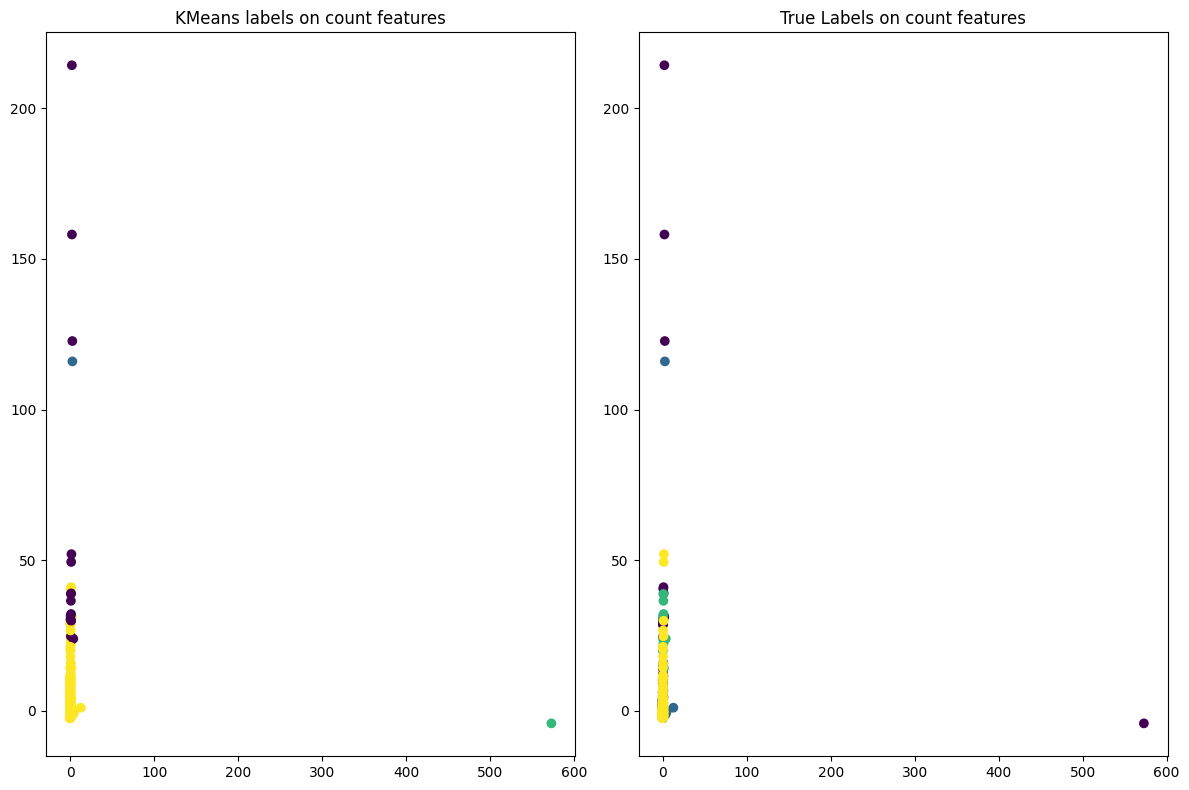

In [10]:
## perform pca
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

## plot the kmeans outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=km.labels_)
axs[0].set_title('KMeans labels on count features')


## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels on count features')
plt.show()

## Normalization

I can see that some data are further away from each other while others are colocated and also the scale is very different. This can be solved by normalizing data.

In [11]:
# normalise by dividing each feature row by its L2 norm
from sklearn.preprocessing import Normalizer
l2_norm = Normalizer(norm='l2')
features_normalised = l2_norm.fit_transform(features.toarray())

features_normalised.shape

(2373, 5562)

In [12]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=6)
l2_norm = Normalizer(norm='l2')

km = KMeans(n_clusters=4)

pipe = make_pipeline(cv, l2_norm, km)
pipe.fit(articles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=6, stop_words='english')),
                ('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=4))])

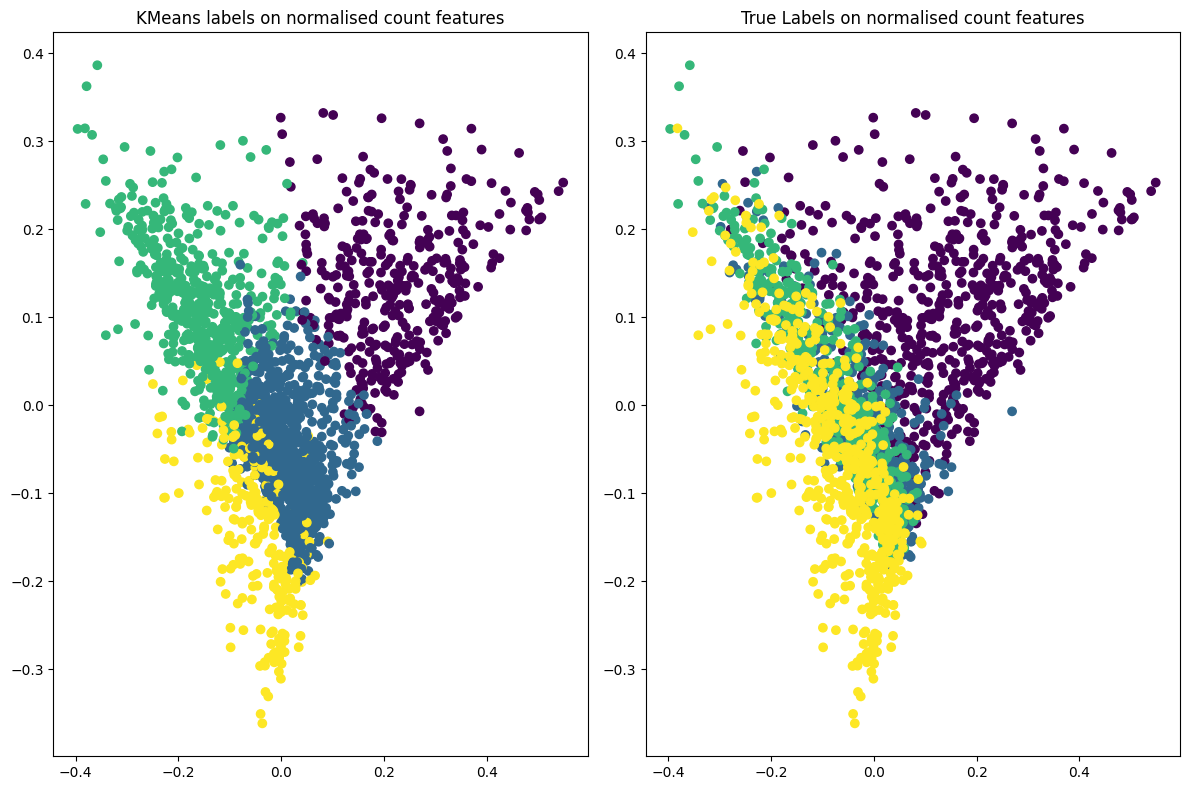

In [13]:
## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features_normalised)

## plot the kmeans outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=km.labels_)
axs[0].set_title('KMeans labels on normalised count features')


## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels on normalised count features')
plt.show()


Data is now closer and Kmeans have better meaning. We can use TFIDF to further improve this

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=5,
                    norm='l2')

features = tfidf.fit_transform(raw_documents=docs.article.values)

km = KMeans(n_clusters=4)

pipe = make_pipeline(tfidf, km)
pipe.fit(articles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=5, stop_words='english')),
                ('kmeans', KMeans(n_clusters=4))])

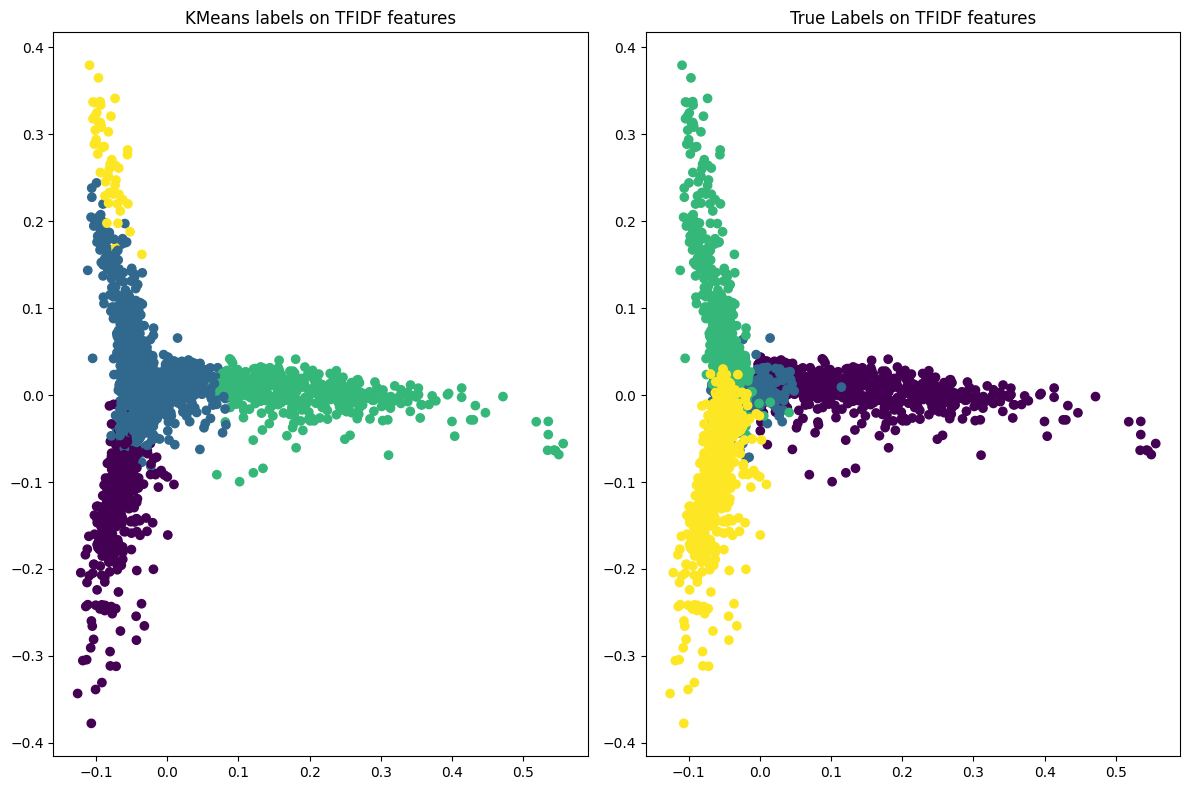

In [15]:
## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

## plot the kmeans outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=km.labels_)
axs[0].set_title('KMeans labels on TFIDF features')


## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels on TFIDF features')
plt.show()


Here we can clearly see the data has been seperated into clusters


III Implement the hard-EM (you derived above) and soft-EM (derived in Chapter 5 of Module
4). Please provide enough comments in your submitted code. Hint: If it helps, feel free to
base your code on the provided code for EM algorithm for GMM in Activity 4.1).


Based on the derivation in Task 1.I we will update the parameters from the base code of HardGMM

In [66]:
import numpy as np
from sklearn.cluster import KMeans

class HardEMDocCluster:
    def __init__(self, K, tau_max=100, epsilon=0.01):
        # Initialization of parameters
        self.K = K               # Number of clusters
        self.tau_max = tau_max   # Maximum number of iterations
        self.epsilon = epsilon  # Minimum acceptable error rate
        self.Psi_hat = None     # Prior probabilities for each cluster
        self.Nk_hat = None      # Effective counts of documents in each cluster
        self.Mu_hat_ = None          # Cluster centroids
        self.Mu_hat_historic_ = []
        self.gamma_historic_ = []
    def fit(self, x):
        # Initialization
        N, w = x.shape       # N is Number of documents w is Number of features
        # Assume all clusters have same probability.E.g. If k=4 probability will be .25 for each cluster
        self.Psi_hat = np.array([1/self.K] * self.K)
        self.Nk_hat = self.Psi_hat * N
        self.Mu_hat_ = np.zeros((self.K, w)) # Setting shape of Mu as 0 for weight based on number of clusters

        # Initialize cluster centroids using KMeans
        km = KMeans(n_clusters=self.K)
        km.fit(x)
        self.Mu_hat_ = km.cluster_centers_
        self.Mu_hat_ = self.Mu_hat_ / np.sum(self.Mu_hat_, axis=1, keepdims=True) # Normalize

        gamma = np.zeros((N, self.K))  # Posterior probabilities for each document and cluster
        #Here Historic is saved for plotting
        self.Mu_hat_historic_ = np.zeros(shape=(list(self.Mu_hat_.shape) + [self.tau_max]))
        self.gamma_historic_ = np.zeros(shape=(N, self.K, self.tau_max))

        small_num = 1e-4 # This avoids log(0)
        terminate = False
        tau = 1 # Iteration counter

        Mu_hat_old = self.Mu_hat_  # Store the last iteration value for Mu hat

        # EM Iteration
        while not terminate:
            # E-Step
            for k in range(self.K):
                # Here gamma is calculated based on the quation derived in I.
                gamma[:, k] = np.log(self.Psi_hat[k]) + x.dot(np.log(self.Mu_hat_[k].T+small_num))

            max_clip_function = lambda x: np.array([1 if i == x.argmax() else 0 for i in range(len(x))])
            gamma = np.array(list(map(max_clip_function, gamma)), dtype='float32')
            self.gamma_historic_[:, :, tau] = gamma
            # M-Step
            self.Nk_hat = gamma.sum(axis=0)
            self.Psi_hat = self.Nk_hat / N
            self.Mu_hat_ = gamma.T @ x + small_num
            self.Mu_hat_ = self.Mu_hat_ / self.Mu_hat_.sum(axis=1, keepdims=True) # Normalize
            self.Mu_hat_historic_[:, :, tau] = self.Mu_hat_
            tau += 1  # Increment iteration counter

            terminate = tau == self.tau_max or np.allclose(self.Mu_hat_, Mu_hat_old, rtol=self.epsilon)
            Mu_hat_old = self.Mu_hat_  # Update Mu_hat_old for next iteration
        self.Mu_hat_historic_ = self.Mu_hat_historic_[:, :, :tau]
        self.gamma_historic_ = self.gamma_historic_[:, :, :tau]
        print(f'Converged in {tau} iterations')

    def predict_proba(self, x):
        # Predict cluster assignments for new data
        N, w = x.shape
        gamma = np.zeros((N, self.K))
        small_num =1e-4

        # Calculate posterior probabilities for new data
        for k in range(self.K):
            gamma[:, k] = np.log(self.Psi_hat[k]) + x.dot(np.log(self.Mu_hat_[k].T+small_num))

        return gamma  # Return posterior probabilities
    def predict(self, x):
        probs = self.predict_proba(x)
        preds = np.argmax(probs, axis=1)
        return preds

In [76]:
import numpy as np
import scipy.special

class SoftEMDocCluster:
    def __init__(self, K, tau_max=10000, epsilon=0.01):
        # Initialization of parameters
        self.K = K               # Number of clusters
        self.tau_max = tau_max   # Maximum number of iterations
        self.epsilon = epsilon  # Minimum acceptable error rate
        self.Psi_hat = None     # Prior probabilities for each cluster
        self.Nk_hat = None      # Effective counts of documents in each cluster
        self.Mu_hat_ = None          # Cluster centroids

    def fit(self, x):
        # Initialization
        N, w = x.shape       # N is Number of documents w is Number of features

        #Assume all clusters have same probability.E.g. If k=4 probability will be .25 for each cluster
        self.Psi_hat = np.array([1 / self.K] * self.K)
        self.Nk_hat = self.Psi_hat * N                  # Effective counts based on Psi_hat

        # Initialize Mu with random values and normalize
        rng = np.random.default_rng()
        random_number = rng.choice(np.linspace(1, 100000), size=(self.K, w), replace=True)
        self.Mu = random_number / np.sum(random_number, axis=1, keepdims=True)

        gamma = np.ones((N, self.K))  # Posterior probabilities for each document and cluster
        small_num = 1e-20          # This avoids log(0)
        terminate = False
        tau = 1
        Mu_hat_old = self.Mu
        # EM Iteration
        while not terminate:
            # E-Step
            for k in range(self.K):

                gamma[:, k] = np.log(self.Psi_hat[k]) + x.dot(np.log(self.Mu[k].T))
            gamma = gamma / (gamma.sum(axis=1, keepdims=True))  # Normalize gamma
            # M-Step
            self.Nk_hat = gamma.sum(axis=0)
            self.Psi_hat = self.Nk_hat / N
            self.Mu = gamma.T @ x + small_num
            self.Mu = self.Mu / self.Nk_hat.reshape((-1, 1))
            tau += 1
            terminate = tau >= self.tau_max or np.allclose(self.Mu, Mu_hat_old, rtol=self.epsilon)
            Mu_hat_old = self.Mu

        print(f'Converged in {tau - 1} iterations')
        return tau - 1

    def predict_proba(self, x):
        # Predict cluster assignments for new data
        N, w = x.shape
        gamma = np.zeros((N, self.K))
        # Calculate posterior probabilities for new data
        for k in range(self.K):
            gamma[:, k] = np.log(self.Psi_hat[k]) + x.dot(np.log(self.Mu[k].T))
        gamma = gamma / (gamma.sum(axis=1, keepdims=True))  # Normalize gamma

        return gamma  # Return posterior probabilities

    def predict(self, x):
        probs = self.predict_proba(x)
        preds = np.argmax(probs, axis=1)
        return preds


IV Set the number of clusters K=4, and run both the soft-EM and hard-EM algorithms on the
provided data.


In [68]:
hard_em = HardEMDocCluster(K=4,tau_max=200, epsilon=0.01)

In [69]:
hard_em.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged in 11 iterations


In [70]:
hard_preds = hard_em.predict(features)

In [78]:
soft_em = SoftEMDocCluster(K=4,tau_max=200, epsilon=0.01)

In [79]:
soft_em.fit(features)

Converged in 3 iterations


3

In [80]:
soft_preds = soft_em.predict(features)

V Perform a PCA on the clusterings that you get based on the hard-EM and soft-EM in the
same way we did in Activity 4.1. Then, plot the obtained clusters with different colors where
x and y axes are the first two principal components (similar to Activity 4.2). Based on your
plots, discuss how and why the hard and soft-EM are different in a markdown cell.

In [74]:
hard_preds

array([3, 3, 3, ..., 2, 2, 2])

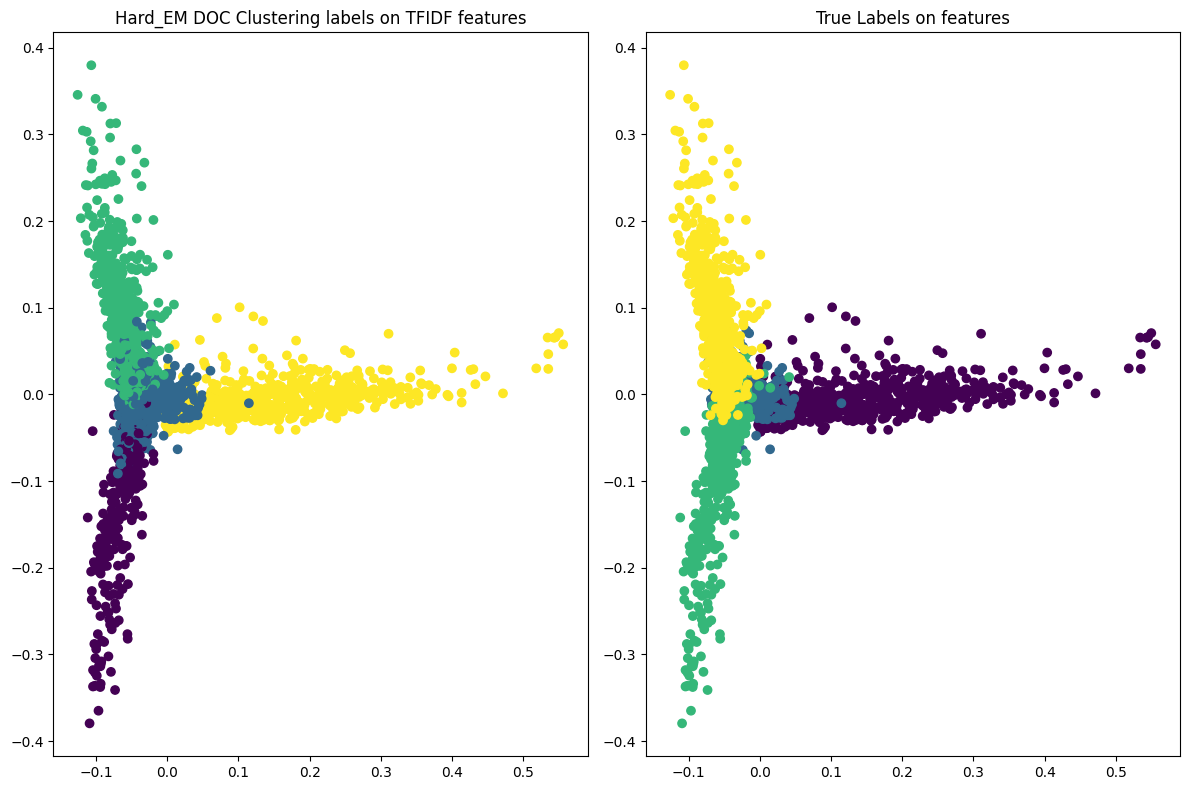

In [85]:
# Predict the cluster assignments for the feature array
predicted_labels = hard_preds


## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

# plot the Hard_EM outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=predicted_labels)
axs[0].set_title('Hard_EM DOC Clustering labels on TFIDF features')


## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels on features')
plt.show()

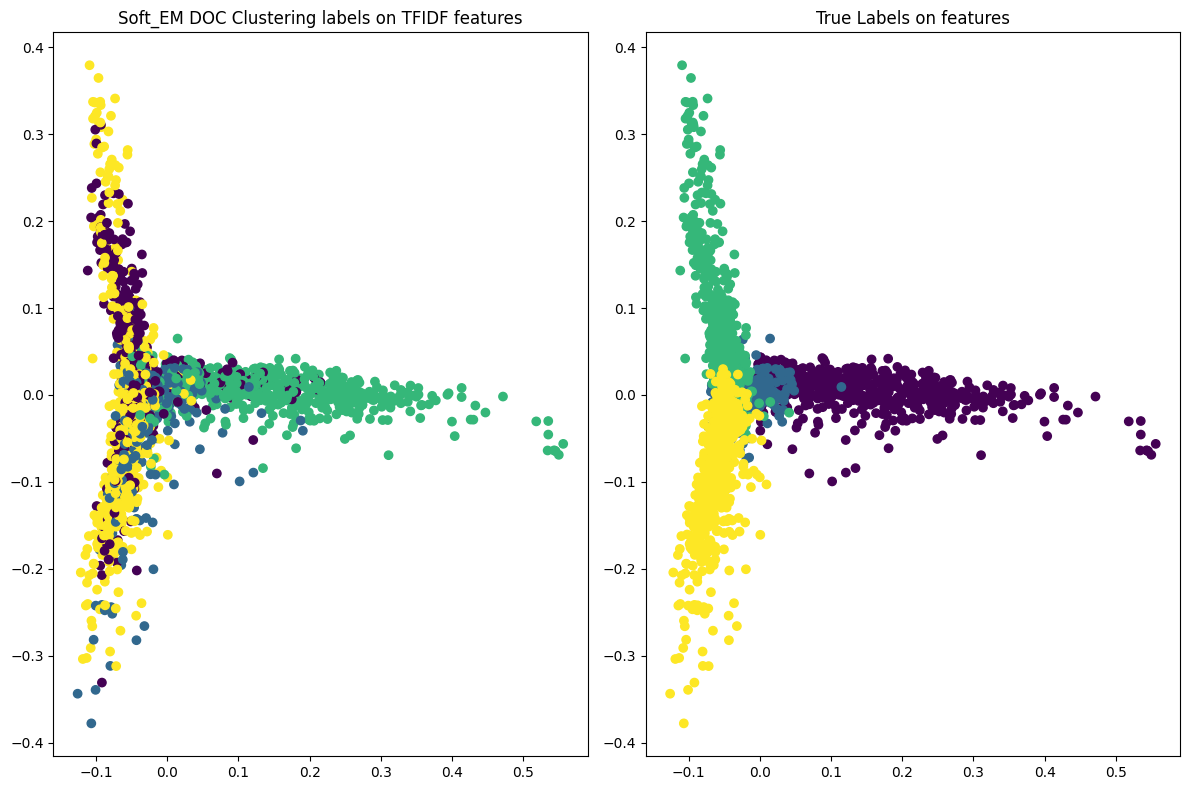

In [84]:
# Predict the cluster assignments for the feature array
predicted_labels = soft_preds


## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

# plot the Hard_EM outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=predicted_labels)
axs[0].set_title('Soft_EM DOC Clustering labels on TFIDF features')


## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels on features')
plt.show()


From the plot we can easily see that Hard Em can easily differentiate and seperate the cluster whereas softem does not do that well with the parameters given.

The size of the cluster is softem is bigger and is overlapping between multiple clusters

Hardem has been able to correctly identify some complex relationship. Looking at the T section of Hardem we can see that it has misidentified some values but does pretty good on both left and right hand of the T.

Soft clustering assign each point to multiple cluster which might have caused the overlapping issue.

Moreover we did not explore multiple hyperparameters which couldve resulted in this issue.
